In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn import metrics

## Read data

In [2]:
data = pd.read_csv("candy-data.csv")
n = len(data)

In [3]:
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
# select data
feature_cols = ['peanutyalmondy', 'bar', 'sugarpercent']
X = data[feature_cols] # Features
y = data.chocolate

## Visualize data

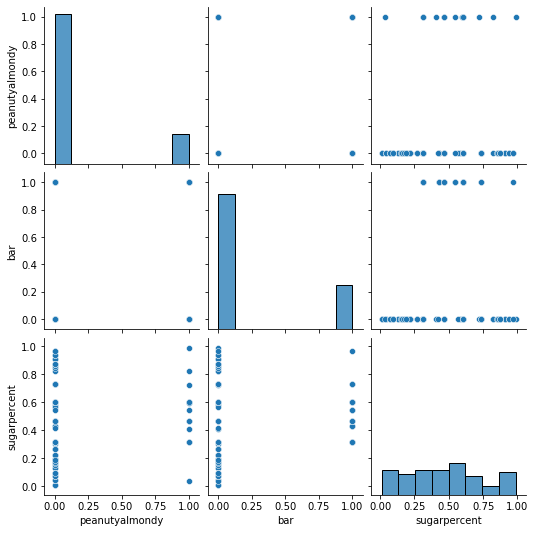

In [5]:
sns.pairplot(X)

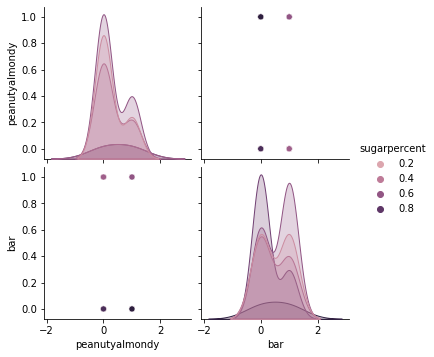

In [6]:
sns.pairplot(X,hue="sugarpercent")

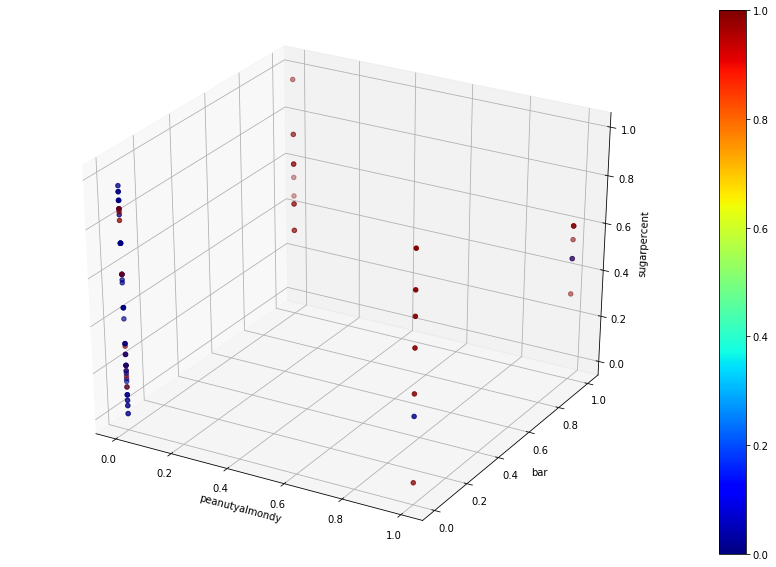

In [7]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(X.peanutyalmondy,X.bar,X.sugarpercent,c=y,cmap="jet")
fig.colorbar(img)
ax.set_xlabel(feature_cols[0])
ax.set_ylabel(feature_cols[1])
ax.set_zlabel(feature_cols[2])
plt.show()

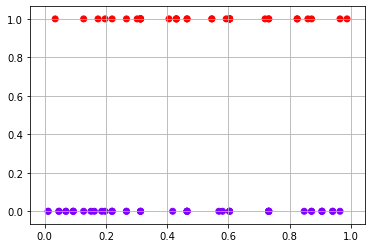

In [8]:
plt.scatter(X.sugarpercent,y,c=y,cmap="rainbow")
plt.grid()

## Split the dataset

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [10]:
len(X_train)

63

In [11]:
len(X_test)

22

## Perform logistic regression

In [12]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

## Make prediction using the model

In [13]:
y_pred=log_reg.predict(X_test)

In [14]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

## Confusion matrix

In [15]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

In [16]:
cnf_matrix

array([[12,  0],
       [ 4,  6]])

Text(0.5, 257.44, 'Chocolate')

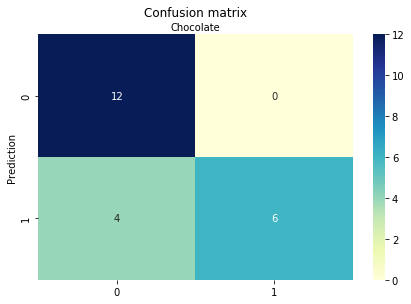

In [17]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Prediction')
plt.xlabel('Chocolate')

## Performance metrics

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8181818181818182
Precision: 1.0
Recall: 0.6


## Decision plane

In [19]:
coefs = log_reg.coef_[0]
intercept = log_reg.intercept_

In [20]:
x1s = np.outer(np.linspace(0, 1, 20), np.ones(20))
x2s = x1s.copy().T # transpose
x3s = -1/coefs[2]*(coefs[0]*x1s + coefs[1]*x2s + intercept)

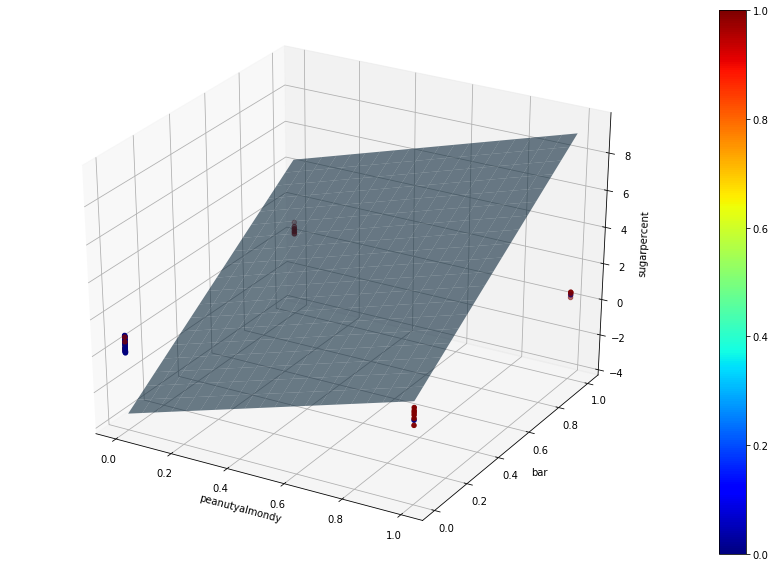

In [21]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(X.peanutyalmondy,X.bar,X.sugarpercent,c=y,cmap="jet")
ax.plot_surface(x1s,x2s,x3s,alpha=0.6)
fig.colorbar(img)
ax.set_xlabel(feature_cols[0])
ax.set_ylabel(feature_cols[1])
ax.set_zlabel(feature_cols[2])
plt.show()

## ROC curve
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity

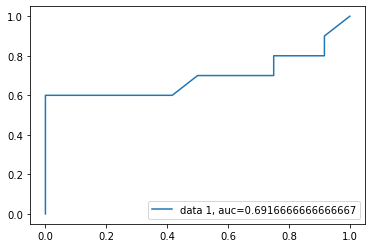

In [22]:
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Training curve

In [23]:
train_sizes,train_scores,test_scores = learning_curve(LogisticRegression(),X,y,cv=10,scoring='accuracy',n_jobs=1,train_sizes=np.linspace(0.01,1,70))

/home/bandala/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 69 instead of 70.
  warnings.warn(


In [24]:
# statistic results
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

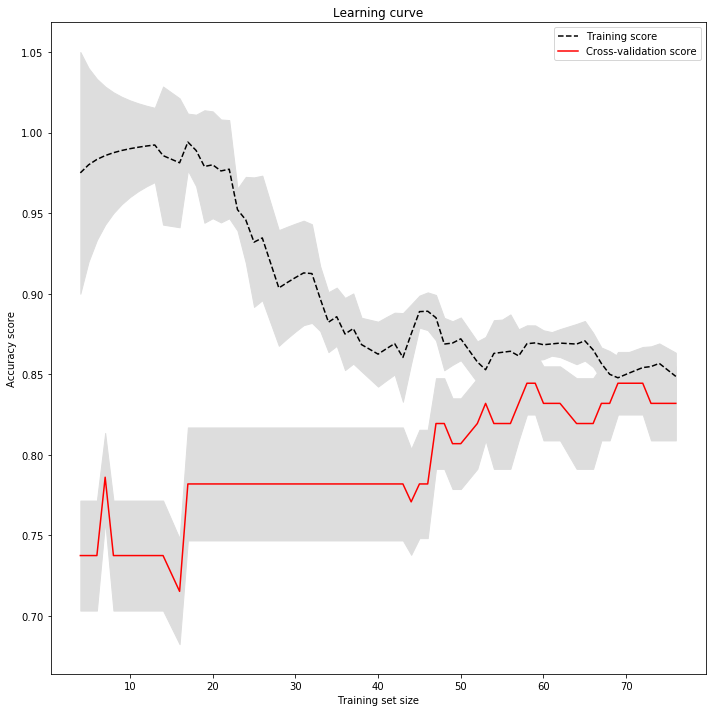

In [25]:
plt.subplots(1,figsize=(10,10))
# draw lines
plt.plot(train_sizes,train_mean,"--",color="black",label="Training score")
plt.plot(train_sizes,test_mean,color="red",label="Cross-validation score")
# draw bands
plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color="#DDDDDD")
plt.fill_between(train_sizes,test_mean-0.2*test_std,test_mean+0.2*test_std,color="#DDDDDD")
# create plot
plt.title("Learning curve")
plt.xlabel("Training set size")
plt.ylabel("Accuracy score")
plt.legend(loc="best")
plt.tight_layout()

## 3D graph

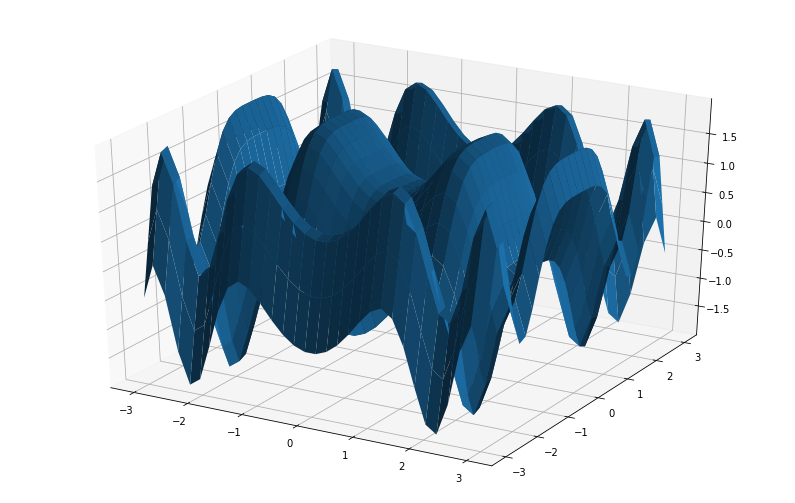

In [26]:
# Creating dataset
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
y = x.copy().T # transpose
z = (np.sin(x **2) + np.cos(y **2) )
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
# Creating plot
ax.plot_surface(x, y, z)